# EE219 Project 1

Team members:  
Yichen Wu 504294181  
Siyuan Chen

### Required Packages:
nltk v3.2.5  
numpy v1.14.0  
scikit-learn v0.19.1  
scipy 1.0.0  
matplotlib v2.1.2  

#### a) Plot a histogram of the number of training documents per class

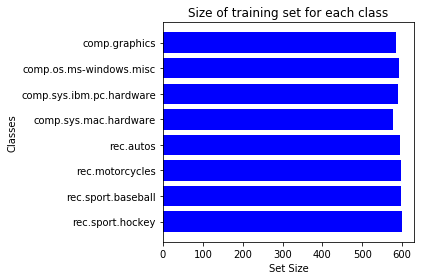

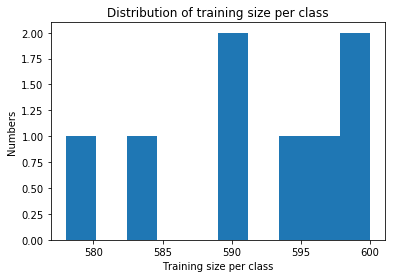

In [2]:
import numpy as np
import pylab as pl
import logging
from logging.config import fileConfig
from sklearn.datasets import fetch_20newsgroups

logging.info("Problem a")

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

cat_sum_train = []          # training data size of each class 0-7
cat_sum_test = []           # testing data size of each class 0-7

for i in range(len(categories)):
    temp = fetch_20newsgroups(subset='train', categories=[categories[i]], shuffle=True, random_state=42)
    cat_sum_train.append(len(temp.data))
    temp = fetch_20newsgroups(subset='test', categories=[categories[i]], shuffle=True, random_state=42)
    cat_sum_test.append(len(temp.data))

y_pos = np.arange(len(categories))
pl.figure(1)
pl.barh(y_pos, cat_sum_train, align='center', color='blue', ecolor='black')
pl.xlabel("Set Size")
pl.ylabel("Classes")
pl.title("Size of training set for each class")
pl.yticks(y_pos, categories)
pl.gca().invert_yaxis()
pl.tight_layout()

pl.figure(2)
pl.hist(cat_sum_train)
pl.title("Distribution of training size per class")
pl.xlabel("Training size per class")
pl.ylabel("Numbers")
pl.show()

#### b) TFxIDF

In [ ]:
def stem_and_tokenize(doc):
    exclude = set(string.punctuation)
    no_punctuation = ''.join(ch for ch in doc if ch not in exclude)
    tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(no_punctuation)
    stemmer = SnowballStemmer("english", ignore_stopwords=True)
    return [stemmer.stem(t) for t in tokens]


tfidf_transformer = TfidfTransformer(sublinear_tf=True, smooth_idf=False, use_idf=True)

vectorizer = CountVectorizer(min_df=MIN_DF, stop_words=ENGLISH_STOP_WORDS, tokenizer=stem_and_tokenize)
M = vectorizer.fit_transform(train_data.data)
M_train_tfidf = tfidf_transformer.fit_transform(M)
print("With min_df = %d , (training documents, terms extracted): " % MIN_DF, M_train_tfidf.shape)


With min_df = 2 , (training documents, terms extracted):  (4732, 21895)  
With min_df = 5 , (training documents, terms extracted):  (4732, 8892)

#### c) Top 10 significant terms for selected classes

In [ ]:
all_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

string_of_each_class = []
for i in range(len(all_data.target_names)):
    string_of_each_class.append("")

for i in range(len(all_data.data)):
    string_of_each_class[all_data.target[i]] = string_of_each_class[all_data.target[i]] + " " + all_data.data[i]

vectorizer = CountVectorizer(min_df=MIN_DF, analyzer="word", stop_words=ENGLISH_STOP_WORDS, tokenizer=stem_and_tokenize)
M = vectorizer.fit_transform(string_of_each_class)
M_train_tficf = tfidf_transformer.fit_transform(M)
print("With min_df = %d, (all classes, terms extracted): " % MIN_DF, M_train_tficf.shape)

duration = timer()-start
print("Computation Time in secs: ", duration)

cat_top10 = ["comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "misc.forsale", "soc.religion.christian"]
print("With min_df = %d" % MIN_DF)

for name in cat_top10:
    index = all_data.target_names.index(name)
    arr = M_train_tficf.toarray()[index]
    sig_terms = np.argsort(arr)[-10:][-1::-1]
    logging.info(name)
    logging.info(sig_terms)
    print("Top 10 most significant terms in class %s are:" % name)
    for i in sig_terms:
        print(vectorizer.get_feature_names()[i])


With min_df = 2, (all classes, terms extracted):  (20, 31410)

Top 10 most significant terms in class comp.sys.ibm.pc.hardware are:
>scsi1  
>adaptec  
>scsi2  
>com4  
>scsi  
>guydaustinibmcom  
>ide  
>nanao  
>hoskyn  
>dx2    

Top 10 most significant terms in class comp.sys.mac.hardware are:
>quadra  
>pds  
>centri  
>nubus  
>powerbook  
>iisi  
>performa  
>duo  
>iivx  
>powerpc    

Top 10 most significant terms in class misc.forsale are:
>wolverin  
>hobgoblin  
>pom  
>hulk  
>obo  
>forsal  
>lobo  
>superman  
>sega  
>070  

Top 10 most significant terms in class soc.religion.christian are:
>boswel  
>byler  
>psalm  
>apostl  
>leviticus  
>siemon  
>jayn  
>bestial  
>consecr  
>baptiz  

With min_df = 5, (all classes, terms extracted):  (20, 11579)  

Top 10 most significant terms in class comp.sys.ibm.pc.hardware are:  
>scsi  
ide  
vlb  
irq  
motherboard  
bio  
cmos  
esdi  
ati  
seagat  

Top 10 most significant terms in class comp.sys.mac.hardware are:  
>fpu  
simm  
scsi  
vram  
iici  
040  
mhz  
68040 
lc  
dock  

Top 10 most significant terms in class misc.forsale are:  
>forsal  
cod  
scsi  
mpc  
840  
meg  
motherboard  
panason  
420  
thor  

Top 10 most significant terms in class soc.religion.christian are:  
>scriptur  
baptism  
homosexu  
cathol  
mormon  
testament  
gospel  
theolog  
gentil  
spiritu  

#### d) 